In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Ratings

Nacitanie datasetu s hodnoteniami

In [32]:
data = pd.read_csv('../data/Jester-Dataset-ratings.csv', delimiter=',')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
USER_ID    1048575 non-null int64
JOKE_ID    1048575 non-null int64
Rating     1048575 non-null float64
dtypes: float64(1), int64(2)
memory usage: 24.0 MB


In [5]:
data.head()

,USER_ID,JOKE_ID,Rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


## Popis stplcov

In [6]:
data.columns

Index(['USER_ID', 'JOKE_ID', 'Rating'], dtype='object')

Dataset s hodnoteniami sa skladá z troch stĺpcov:
 - USER_ID - identifikátor používateľa, ktorý hodnotil položku
 - JOKE_ID - identifikátor položky, ktorá bola hodnotená
 - Rating - hodnotenie položky

## Početnosti

In [7]:
np.shape(data)

(1048575, 3)

In [8]:
len(data.USER_ID.unique())

36531

In [9]:
len(data.JOKE_ID.unique())

140

Dataset obsahuje 1 048 575 záznamov s hodnoteniami. 
Počet vtipov, ktoré boli hodnotené je 140 a počet používateľov, ktorí vtipy hodnotili, je 36531.

## Distribúcia hodnotení

In [10]:
data['Rating'].describe()

count    1.048575e+06
mean     1.532786e+00
std      5.271349e+00
min     -1.000000e+01
25%     -2.156000e+00
50%      2.156000e+00
75%      5.562000e+00
max      1.000000e+01
Name: Rating, dtype: float64

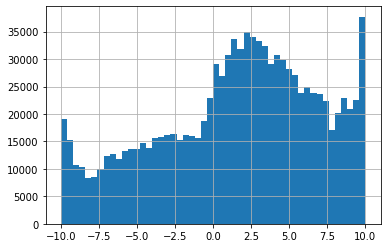

In [11]:
data['Rating'].hist(bins=50)

In [12]:
data['Rating'].unique()

array([  0.219,  -9.281,  -6.781,   0.875,  -9.656,  -9.031,  -7.469,
        -8.719,  -9.156,  -7.188,  -8.781,  -8.531,  -7.906,   9.812,
         9.906,   0.75 ,  -5.   ,   2.938,   2.   ,  -0.156,   2.031,
         5.688,   9.656,   8.   ,   9.312,   8.781,   8.688,   0.   ,
         0.062,  -0.25 ,  -0.125,   0.125,   0.031,   3.625,   3.344,
        -9.688,   9.938,   9.531,   0.406,   3.719,  -2.688,  -9.562,
        -9.125,   9.781,   3.125,   9.844,  -4.25 ,   5.125,   9.562,
        -4.312,   4.781,   5.5  ,   4.969,  -2.125,   4.75 ,   3.688,
        -0.312,  -0.781,   3.938,   9.281,  -9.844,  -7.219,  -2.031,
        -9.938,  -9.969,  -9.875,  -9.812,  -9.781,  -6.844,   1.25 ,
         0.344,  -5.812,  -4.5  ,  -4.906,   6.906,  -5.906,  -0.406,
        -4.031,   3.875,   6.219,   5.656,   6.094,   5.406,   0.25 ,
         4.438,   5.562,   0.5  ,   0.312,   3.812,   0.625,   1.969,
         4.906,   4.469,   0.469,   4.281,   0.438,   2.594,   0.781,
         6.   ,   7.

Hodnotenia sa pohybujú na číselnej škále od -10 do 10. Priemerné hodnotenie sa pohybuje na úrovni 1.5. Na základe dát vieme usúdiť, že sa nejedná o normálové rozdelie hodnotení.

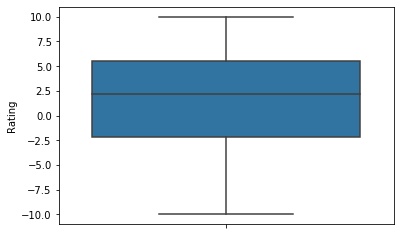

In [28]:
sns.boxplot(y="Rating", data=data)

## Zoskupenie podľa používateľov

In [19]:
data_groupby_user = data.groupby(['USER_ID']).agg({'JOKE_ID': 'count', 'Rating': 'mean'})

In [20]:
data_groupby_user.head()

,JOKE_ID,Rating
USER_ID,,
1,62,2.094694
2,34,3.739029
3,18,-6.817667
4,3,-5.072667
5,82,2.600195


In [21]:
data_groupby_user['JOKE_ID'].describe()

count    36531.000000
mean        28.703704
std         31.656621
min          1.000000
25%          8.000000
50%         16.000000
75%         35.000000
max        140.000000
Name: JOKE_ID, dtype: float64

### Počet hodnotení používateľov

In [22]:
data_groupby_user['JOKE_ID'].describe()

count    36531.000000
mean        28.703704
std         31.656621
min          1.000000
25%          8.000000
50%         16.000000
75%         35.000000
max        140.000000
Name: JOKE_ID, dtype: float64

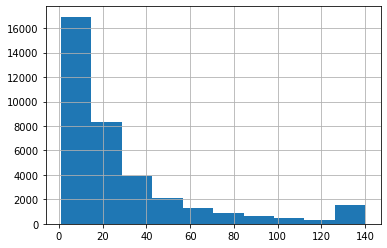

In [23]:
data_groupby_user['JOKE_ID'].hist()

Na grafe môžeme vidieť na 
 - x os - vidíme koľko hodnotení používateľ vykonal
 - y os - počet takých používateľov
 
Priemerne používatelia ohodnotili 28 položiek.

## Zoskupenie podľa vtipov

In [24]:
data_groupby_joke = data.groupby(['JOKE_ID']).agg({'USER_ID': 'count', 'Rating': 'mean'})

In [25]:
data_groupby_joke.head()

,USER_ID,Rating
JOKE_ID,,
5,661,-1.756331
7,36521,-1.843717
8,35705,-0.753566
13,34880,-0.585386
15,34038,-1.446394


Pocet hodnoteni vtipu

In [26]:
data_groupby_joke['USER_ID'].describe()

count      140.000000
mean      7489.821429
std       7287.801443
min        166.000000
25%       3569.750000
50%       5745.000000
75%       8427.750000
max      36521.000000
Name: USER_ID, dtype: float64

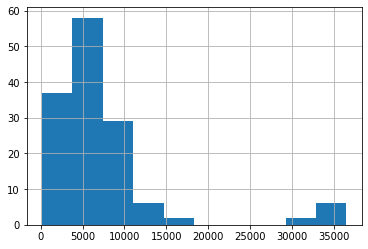

In [27]:
data_groupby_joke['USER_ID'].hist()

Na grafe môžeme vidieť na 
 - x os - vidíme koľko hodnotení vtip dostal
 - y os - počet takých položiek
 
Priemerne vtipy ohodnotilo 7489 používateľov.